In [1]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib inline

In [2]:
# Number of pairs feature/label.
M = 10000

In [9]:
# Input values (features)
x1 = 10.0*np.random.randn(M, 1)

x2 = 10.0*np.random.randn(M, 1)

# Output values (targets).
y = 2.0*x1 + 2.0*x2 + 10.0*np.random.randn(M, 1)

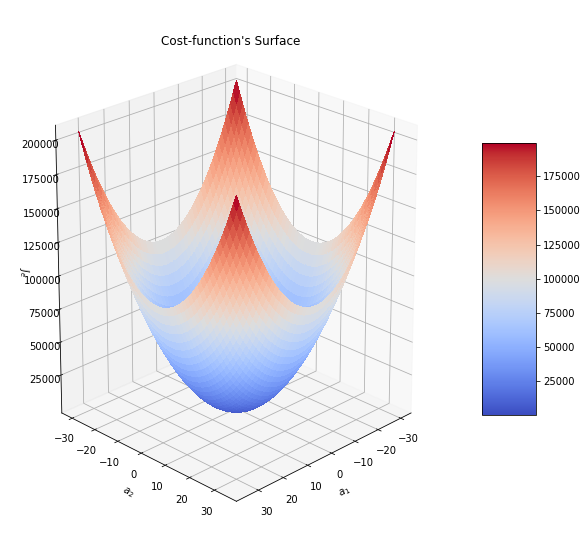

In [10]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-30.0, 34.0, N)
a2 = np.linspace(-30.0, 34.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    
    for iter2 in range(0, N):
        
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
    
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  );

# Plot cost-function surface.
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$');

plt.title('Cost-function\'s Surface')

ax.view_init(20, 45)
fig

#Show the plot.
plt.show()

In [11]:
# Closed-form solution.
X = np.block([x1,x2])

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))

yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2

Joptimum = (1/M)*np.sum(np.power((y - yhat), 2) )

In [12]:
# Gradient-descent solution.
maxNumIter = 10000

alpha = 0.001

# Create empty structures.
a = np.zeros((2, maxNumIter))
Jgd = np.zeros(maxNumIter)

a[0, 0] = -30;
a[1, 0] = -30;

yhat = a[0, 0]*x1 + a[1, 0]*x2

Jgd[0] = (1/M)*np.sum(np.power(y - yhat, 2))

error = 1;
iter = 0;
while(error > 0.001 and iter < maxNumIter-1):
    
    h = a[0, iter]*x1 + a[1, iter]*x2;
    
    update = -(2./M)*np.transpose( (y - h) ).dot(X)
    
    a_aux = a[:, iter] - alpha*np.transpose(update)
    
    a[0, iter+1] = a_aux[0,0]
    
    a[1, iter+1] = a_aux[1,0]
    
    yhat = a[0, iter+1]*x1 + a[1, iter+1]*x2

    Jgd[iter+1] = (1/M)*sum(np.power(y - yhat, 2))
    
    error = np.abs(Jgd[iter]-Jgd[iter+1])
    
    iter = iter + 1

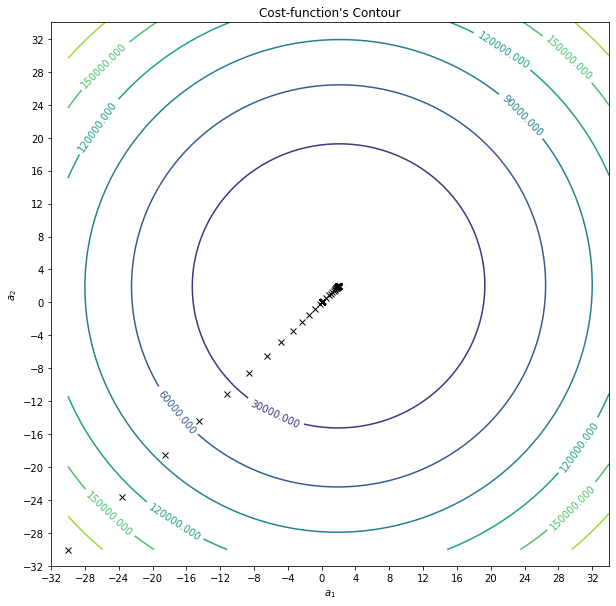

In [13]:
fig = plt.figure(figsize=(10,10))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a[0, :], a[1, :], 'kx')

plt.xticks(np.arange(-32, 34, step=4.0))
plt.yticks(np.arange(-32, 34, step=4.0))
plt.show()

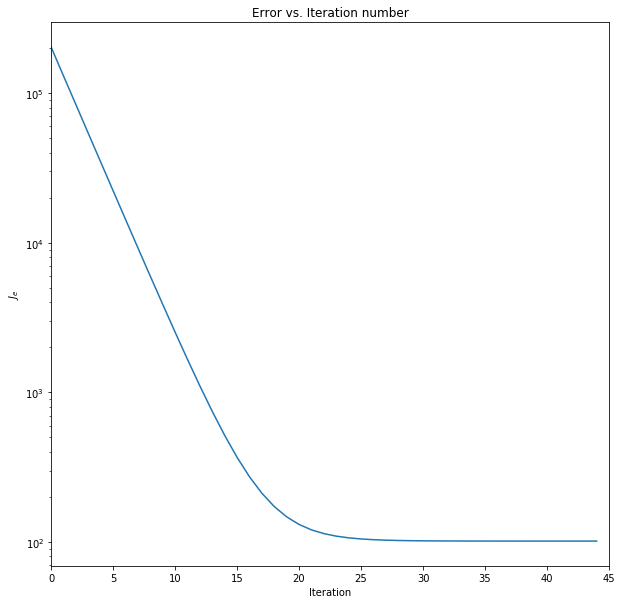

In [14]:
fig = plt.figure(figsize=(10,10))

plt.plot(np.arange(0, iter), Jgd[0:iter])
plt.xlim((0, iter))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()